# Modelo de Regresión Lineal

Módulo 2 - Elementos de probabilidad y estadística

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos

Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---

En las siguientes aplicaciones prácticas, ajustaremos modelos de regresión lineal múltiples para (1) explicar el precio de alquiler de alojamientos AirBnb de Buenos Aires y (2) para explicar el precio de casas de Resistencia según sus características. Iniciaremos con un análisis descriptivo univariado y multivariado, seguido por la estimación del modelo, interpretación de coeficientes, inferencia sobre estos coeficientes estimados y verificación de cumplimiento de supuestos del modelo.

Cargamos las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from scipy.stats import ttest_1samp, ttest_ind # Para pruebas de hipótesis
import statsmodels.api as sm # Para ajustar modelos de regresión

# Aplicación Alojamientos AirBnb

Establecemos conexión a Google Drive para cargar la base de datos "AlojamientosAirBnb.csv"

In [4]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la base
%cd '/content/drive/MyDrive/Diplomatura Ciencia de Datos FaCENA - Módulo 2'

Mounted at /content/drive
/content/drive/MyDrive/Diplomatura Ciencia de Datos FaCENA - Módulo 2


Para setear localmente: descomentar y colocar su path en la siguiente instrucción:

In [ ]:
#os.chdir('')

Cargamos la base de datos:

In [5]:
datos = pd.read_csv("Bases/AlojamientosAirBnb.csv")
datos.head()

,id,precio,tipo,valoraciones,puntaje,personas,dormitorios,banios,estadia,distancia,dependencias
0,1,50,Entire home/apt,1,4.5,2,0,1,3,548.130725,14
1,2,24,Private room,14,5.0,1,1,1,1,1623.405252,31
2,3,65,Private room,0,0.0,2,1,0,1,1529.740914,5
3,4,65,Private room,0,0.0,2,1,1,1,1703.897887,6
4,5,65,Private room,0,0.0,2,1,0,1,1562.032545,5


Descripción de las variables:

* **id**: identificador del alojamiento
* **precio**: precio de una noche de alojamiento medido en dólares
* **tipo**: tipo de alojamiento
* **valoraciones**: cantidad de valoraciones que ha recibido el alojamiento
* **puntaje**: puntaje promedio de un máximo de 5 que recibió el alojamiento
* **personas**: cantidad de personas que puede recibir el alojamiento
* **dormitorios**: cantidad de dormitorios
* **baños**: cantidad de baños
* **estadia**: estadía mínima
* **distancia**: distancia a la estación de trenes más cercana
* **dependencias**: cantidad de dependencias culturales que se encuentran a menos de 300 metros a la redonda


## Análisis descriptivo

Medidas resumen de los datos: media, error estándar, mínimo, máximo y cuartiles:

In [ ]:
datos.describe()

,id,precio,valoraciones,puntaje,personas,dormitorios,banios,estadia,distancia,dependencias
count,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000
mean,2698.500000,70.426612,7.805041,2.537806,2.432543,1.229059,1.066531,3.072461,1033.206753,13.311342
std,1557.835357,92.659073,16.883469,2.334505,1.278354,0.879473,0.801194,2.727156,473.076171,14.389671
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.317087,0.000000
25%,1349.750000,34.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,654.152415,4.000000
50%,2698.500000,50.000000,1.000000,4.000000,2.000000,1.000000,1.000000,3.000000,989.466417,8.000000
75%,4047.250000,75.000000,7.000000,5.000000,3.000000,1.000000,1.000000,4.000000,1415.257710,18.000000
max,5396.000000,4000.000000,180.000000,5.000000,6.000000,10.000000,8.000000,27.000000,2982.306427,97.000000


Visualizamos las distribuciones de cada una de las variables numéricas de la base mediante histogramas de frecuencias relativas.

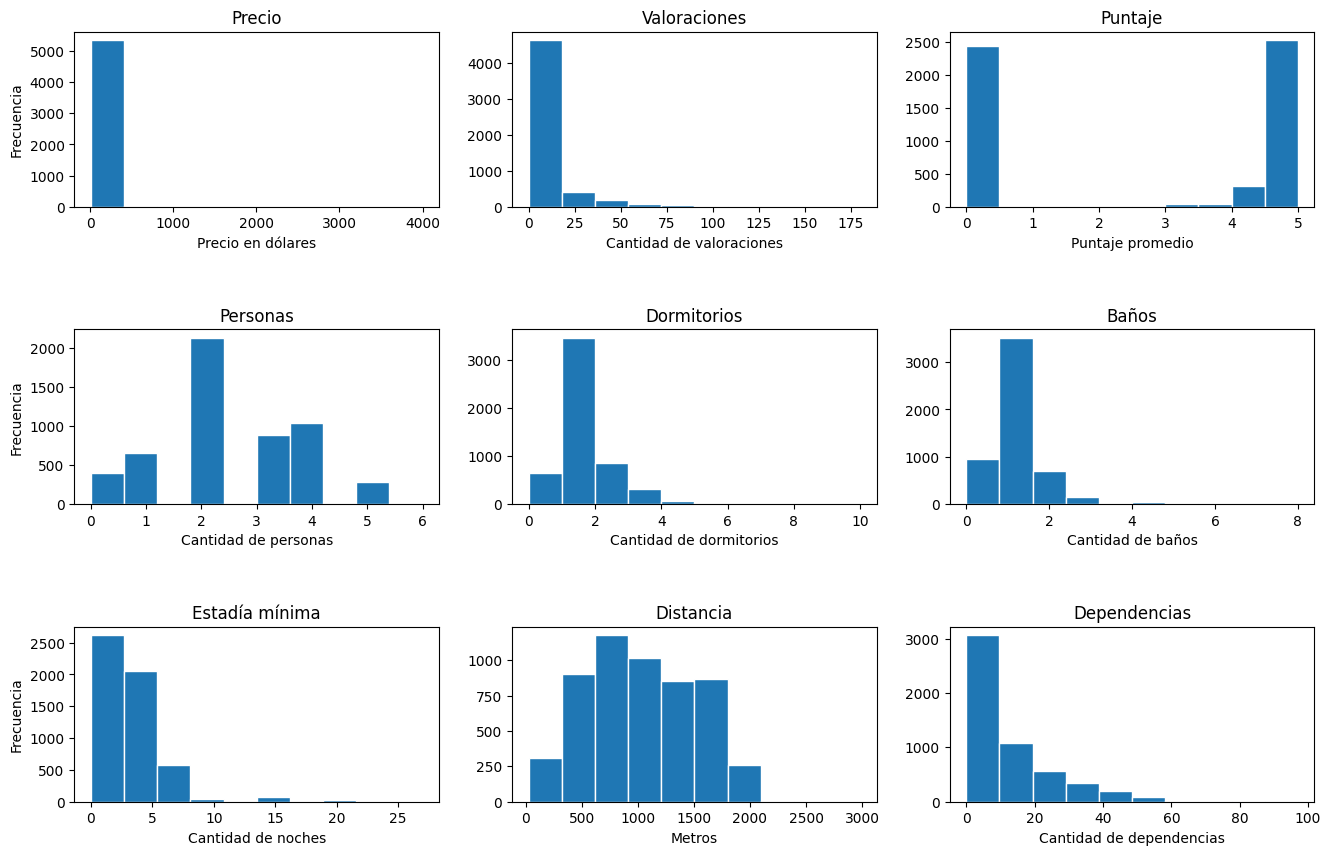

In [ ]:
variables = ['precio','valoraciones','puntaje','personas','dormitorios','banios','estadia','distancia','dependencias']
titulos = ['Precio','Valoraciones','Puntaje','Personas','Dormitorios','Baños','Estadía mínima','Distancia','Dependencias']
xs = ['Precio en dólares','Cantidad de valoraciones','Puntaje promedio','Cantidad de personas',
      'Cantidad de dormitorios','Cantidad de baños','Cantidad de noches','Metros','Cantidad de dependencias']
ys = ['Frecuencia',None, None,'Frecuencia',None,None, 'Frecuencia',None,None]

fig, ax = plt.subplots(3, 3, figsize=(16, 10))

for i in range(3):
  for j in range(3):
    ax[i,j].hist(datos[variables[i*3+j]], edgecolor = "white")
    ax[i,j].set_title(titulos[i*3+j])
    ax[i,j].set_xlabel(xs[i*3+j])
    ax[i,j].set_ylabel(ys[i*3+j])

plt.subplots_adjust(hspace=0.7)
plt.show()

Los histogramas de las variables son bastante variados. Principalmente, para los efectos de ajustar un modelo de regresión lineal para el precio nos interesa ver cómo se distribuye la variable 'precio' debido al cumplimiento de supuestos que el modelo requiere. La distribución de las regresoras de nuestro modelo no afectan a la inferencia porque no influyen en la distribución de nuestros estimadores.

Podemos ver también la matriz de correlaciones entre variables numéricas:

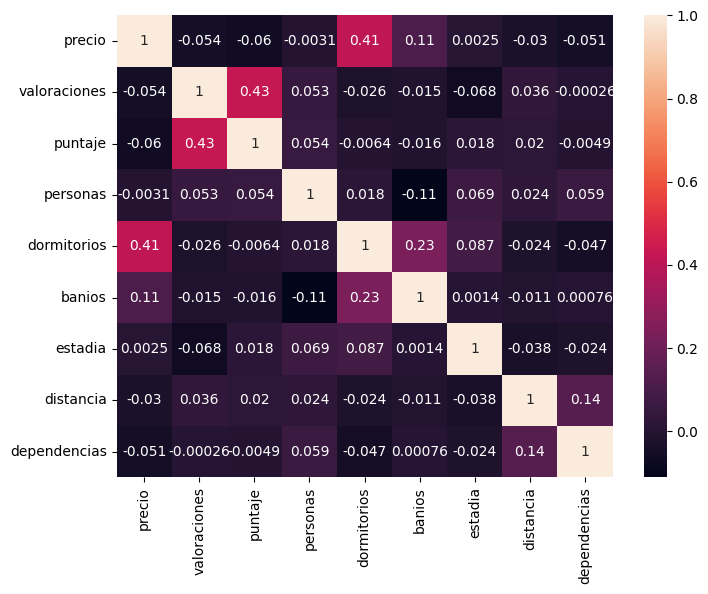

In [ ]:
corr_datos = datos[['precio','valoraciones','puntaje','personas','dormitorios','banios','estadia','distancia','dependencias']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_datos, annot=True)
plt.show()

En este caso vemos que las dos relaciones lineales más fuertes son entre las variables valoraciones y puntaje con un coeficiente de correlación igual a 0.43 y entre dormitorios y precio con un coeficiente igual a 0.41.
De las demás son de destacar por ejemplo el coeficiente de 0.23 entre dormitorios y banios y 0.14 entre distancia y dependencias.

Analizamos la distribución de la variable a explicar con nuestro modelo:

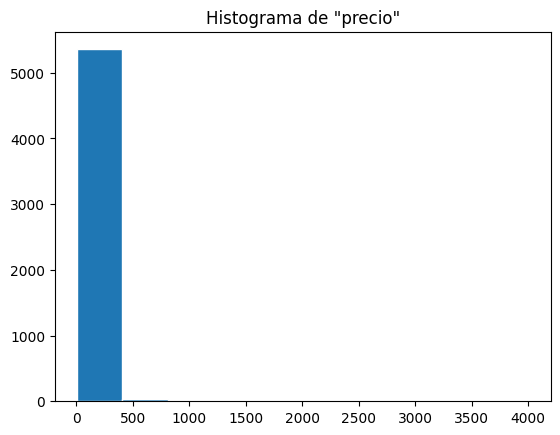

In [ ]:
plt.hist(datos['precio'], edgecolor="white", bins=10)
plt.title('Histograma de "precio"')
plt.show()

Transformamos la variable para poder trabajar con una distribución más aproximada a la normal (según los supuestos del modelo), además de las ventajas interpretativas que veremos con el ajuste del modelo.

In [ ]:
datos['log_precio'] = np.log(datos['precio'])

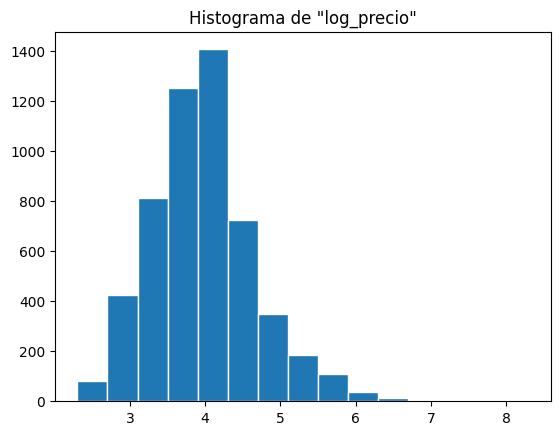

In [ ]:
y = datos['log_precio']
plt.hist(datos['log_precio'], edgecolor="white", bins=15)
plt.title('Histograma de "log_precio"')
plt.show()

Podemos incluir al modelo variables categóricas. Por ejemplo, la variable 'tipo' de alojamiento. Podemos observar que gráficamente se ven diferencias de medias en 'log_precio', en clases anteriores vimos las diferencias de precio promedio en dólares para estos tres casos.

<Axes: xlabel='log_precio', ylabel='tipo'>

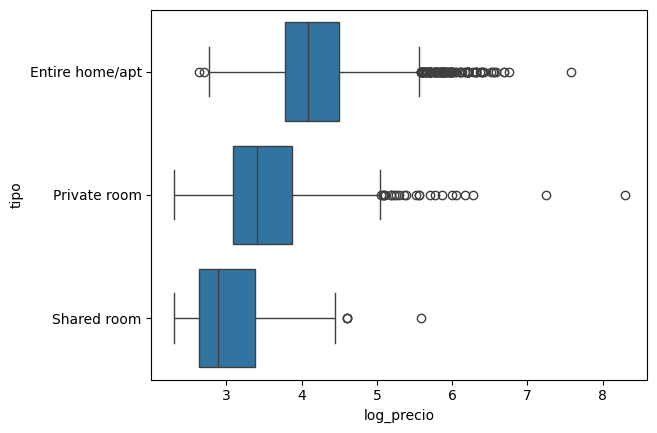

In [ ]:
sns.boxplot(x=datos['log_precio'], y=datos['tipo'])

La media es menor en el caso de habitación compartida y mayor en el caso de casa o departamento entero. Se puede observar menor dispersión, menos datos atipicos en las habitaciones más baratas (habitaciones compartidas). En cambio en aquellas observaciones que corresponden a individuos que alquilan a precios
altos (habitaciones privadas/casas o departamentos enteros), la dispersión es mayor.

Renombramos las categorías de la variable 'tipo' y creamos variables binarias para incluir en el modelo de regresión lineal:

In [ ]:
# Renombramos las categorías
categorias_renombradas = {'Entire home/apt' : 'aloj_entero', 'Private room' : 'hab_privada', 'Shared room':'hab_compartida'}
datos['tipo'] = datos['tipo'].replace(categorias_renombradas)

# Creamos las variables dummies (binarias)
dummies = pd.get_dummies(datos['tipo'], drop_first=False, dtype=int)
datos[dummies.columns] = dummies

# 'drop_first=True' indica que elimine la binaria para la primera categoría, en este caso 'aloj_completo'
# 'dtype=int' las crea con valores 0 y 1, sino las genera como booleanas

Las variables de la base nos quedan:

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396 entries, 0 to 5395
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5396 non-null   int64  
 1   precio          5396 non-null   int64  
 2   tipo            5396 non-null   object 
 3   valoraciones    5396 non-null   int64  
 4   puntaje         5396 non-null   float64
 5   personas        5396 non-null   int64  
 6   dormitorios     5396 non-null   int64  
 7   banios          5396 non-null   int64  
 8   estadia         5396 non-null   int64  
 9   distancia       5396 non-null   float64
 10  dependencias    5396 non-null   int64  
 11  log_precio      5396 non-null   float64
 12  aloj_entero     5396 non-null   int64  
 13  hab_compartida  5396 non-null   int64  
 14  hab_privada     5396 non-null   int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 632.5+ KB


## Ajuste del modelo

El objetivo es ajustar un modelo de regresión para explicar precio en dólares pagado por la estadía por una noche (precio), explicado por las variables que caracterizan a los alojamientos AirBnb vistas previamente. El modelo que estimaremos es el siguiente:

$$
log\_precio=\beta_0+\beta_1 aloj\_entero+\beta_2hab\_privada+\beta_3valoraciones + \beta_4puntaje + \beta_5personas +
\\
\beta_6 dormitorios + \beta_7 baños + \beta_8estadia + \beta_9distancia + \beta_{10}dependencias + \varepsilon
$$


Ajustamos el modelo con la función OLS() de statsmodels, OLS hace referencia a Ordinary Least Squares (Mínimos Cuadrados Ordinarios, visto en clase). Regresamos la variable 'log_precio' respecto a los regresores definidos en el vector x. La ventaja de trabajar con la variable 'precio' transformada no es sólo la normalidad de los residuos, sino también las interpretaciones que podemos hacer de los coeficientes en términos porcentuales.

In [ ]:
# Variables independientes
x = datos[['aloj_entero','hab_privada','valoraciones','puntaje',
           'personas','dormitorios','banios','estadia','distancia','dependencias']]
x = sm.add_constant(x) # Debemos especificar que incluya la ordenada al origen al modelo

# Variable dependiente
y = datos['log_precio']

In [ ]:
modelo = sm.OLS(y,x).fit()

Salida del modelo de regresión lineal:

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     414.3
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:06:24   Log-Likelihood:                -4082.6
No. Observations:                5396   AIC:                             8187.
Df Residuals:                    5385   BIC:                             8260.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8603      0.051     55.771   

In [6]:
datos['tipo'].value_counts()

tipo
Entire home/apt    3708
Private room       1557
Shared room         131
Name: count, dtype: int64

**Significatividad individual de las variables**

$H_0:\beta=0$

$H_1:\beta\neq 0$

Vemos que todas las variables son significativas a un nivel de significancia del 5%, podemos rechazar la hipótesis nula de que sus efectos sobre la variable explicada 'log_precio' son iguales a cero (es decir, tienen efecto en el modelo).

**Coeficientes estimados.** Algunas interpretaciones:

* **aloj_entero:** el alquiler de una noche de un departamento o casa entero tiene un precio, en promedio, 109.18% superior al de una habitación compartida.

* **hab_privada:** el alquiler de una noche de una habitación privada tiene un precio, en promedio, 50.31% superior al de una habitación compartida.

* **valoraciones:** Por cada valoración adicional que recibe el alojamiento, el precio disminuye 0.02%, mientras todas las otras variables predictoras se mantienen constantes.

* **personas:** Ante el aumento de una persona adicional que puede recibir el alojamiento, el precio aumenta 2.63%, mientras todas las otras variables predictoras se mantienen constantes.

* **dormitorios:** El precio aumenta 32.85% por cada dormitorio adicional, mientras todas las otras variables predictoras se mantienen constantes.

## Verificación de supuestos

Chequeamos cumplimiento de los supuestos del modelo de regresión lineal. Para ello, guardamos residuos y predichos del modelo:

In [ ]:
residuos = modelo.resid
predichos = modelo.fittedvalues

1) **Normalidad del error**

El modelo de regresión lineal clásico requiere del cumplimiento del supuesto de normalidad del error para poder realizar inferencia. Es decir, para poder interpretar correctamente los p-valor asociados a los coeficientes y sus intervalos de confianza. Analizamos gráficamente el comportamiento de los residuos.

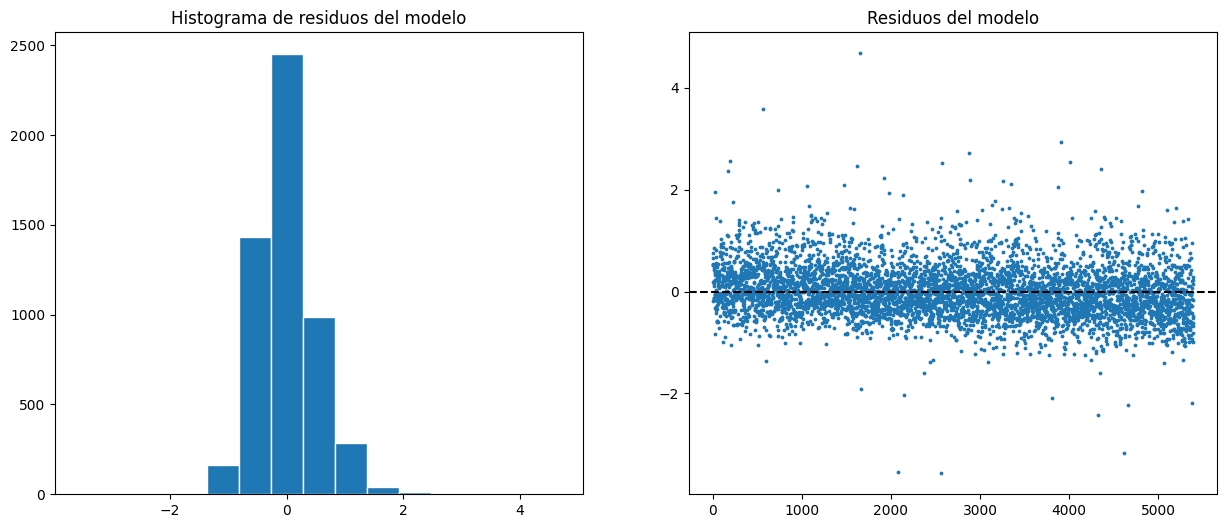

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].hist(residuos, edgecolor="white", bins=15)
ax[0].set_title("Histograma de residuos del modelo")

ax[1].scatter(datos['id'], residuos, s=3)
ax[1].axhline(0, color="black", linestyle="dashed")
ax[1].set_title("Residuos del modelo")

plt.show()

2) **Homocedasticidad:** varianza constante de los residuos

El modelo lineal clásico requiere que la varianza de los residuos no dependa del nivel de los regresores, es decir, que sea constante. Podemos analizar el cumplimiento de este supuesto, primeramente, con un análisis gráfico de residuos vs predichos. Lo que esperamos observar es que la dispersión de los residuos alrededor de su media en 0 se mantiene constante para todo el rango de los predichos.

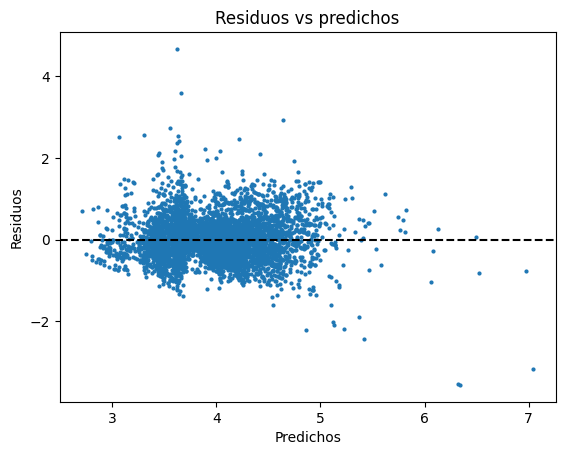

In [ ]:
plt.scatter(predichos, residuos, s=4)
plt.axhline(0, color="black", linestyle="dashed")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs predichos")
plt.show()

**Pruebas para heterocedasticidad**



Podemos implementar tests para probar si existe o no heterocedasticidad en nuestro modelo. Estos test verifican si existe relación significativa entre los residuos al cuadrado de nuestro modelo y las variables regresoras. Dos test muy utilizados son:

\

* **Prueba de Breusch-Pagan**: testea la existencia de heterocedasticidad en forma estrictamente lineal. Por ejemplo, si tenemos dos variables regresoras $x_1$ y $x_2$, ajusta un modelo para verificar si los residuos al cuadrado guardan relación con ellos.

* **Prueba de White:** testea la existencia de heterocedasticidad en cualquier forma lineal. Por ejemplo, al modelo anterior para los residuos al cuadrado adiciona los regresores $x_1$ y $x_2$ en sus expresiones elevadas al cuadrado ($x_1^2$ y $x_2^2$) y el producto entre ellos ($x_1*x_2$). Combina otras formas funcionales que pueden encontraste de heterocedasticidad.

\

Las hipótesis en ambos casos son las siguientes:

$H_0:$ Los residuos son homocedásticos

$H_1:$ Los residuos son heterocedásticos

**Prueba de Breusch-Pagan**

In [ ]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuos, x)
print("Estadístico de prueba:", bp_test[0])
print("p-valor:", bp_test[1])

Estadístico de prueba: 356.85576791796063
p-valor: 1.3969620720567146e-70


In [ ]:
resultado_prueba = "No se rechaza la hipótesis nula de homocedasticidad" if bp_test[1]>0.05 else "Se rechaza la hipótesis nula de homocedasticidad"
print(resultado_prueba)

Se rechaza la hipótesis nula de homocedasticidad


**Prueba de White**

In [ ]:
white_test = sm.stats.diagnostic.het_white(residuos, x)
print("Estadístico de prueba:", white_test[0])
print("p-valor:", bp_test[1])

Estadístico de prueba: 702.1137464463991
p-valor: 1.3969620720567146e-70


In [ ]:
resultado_prueba = "No se rechaza la hipótesis nula de homocedasticidad" if white_test[1]>0.05 else "Se rechaza la hipótesis nula de homocedasticidad"
print(resultado_prueba)

Se rechaza la hipótesis nula de homocedasticidad


**Errores estándar robustos a la heterocedasticidad**

Podemos ajustar el modelo especificando que los errores estándar de las estimaciones de los coeficientes sean robustos a la heterocedasticidad. Las estimaciones de los coeficientes no cambiarán, sólo se verán afectada la inferencia de estas estimaciones. Es decir, los p-valores de las pruebas de significatividad individual y los intervalos de confianza.

In [ ]:
modelo2 = sm.OLS(y,x).fit(cov_type="HC3")
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     282.8
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:08:54   Log-Likelihood:                -4082.6
No. Observations:                5396   AIC:                             8187.
Df Residuals:                    5385   BIC:                             8260.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8603      0.058     49.503   

# Aplicación Casas Resistencia

Cargamos la base de datos "Casas_Resistencia2018.xlsx":

In [ ]:
datos2 = pd.read_excel("Bases/Casas_Resistencia2018.xlsx")
datos2.head()

,precio,habitac,sanit,sup_cubi,sup_terr,distanc,cap_gar,piscina,quincho
0,12560,4,3.0,190.0,420.0,14,2,1,1
1,4750,3,2.0,200.0,514.0,35,2,0,0
2,10680,4,4.5,375.0,875.0,19,2,0,0
3,6080,2,1.0,96.0,384.0,11,1,0,0
4,17480,4,4.0,220.0,332.0,18,2,1,0


Descripción de las variables:

* **precio:** Precio de la casa en miles de pesos (2018)

* **habitac:** Número de habitaciones

* **sanit:** Número de sanitarios

* **sup_cubi:** Superficie cubierta en metros cuadrados

* **sup_terr:** Superficie total del terreno en metros cuadrados

* **distanc**: Distancia a la plaza central de la ciudad

* **cap_gar:**capacidad del garaje medida en número de autos

* **piscina:** si la casa tiene piscina=1

* **quincho:** si la casa tiene quincho=1


## Análisis descriptivo

Medidas resumen de los datos: media, error estándar, mínimo, máximo y cuartiles:

In [ ]:
datos2.describe()

,precio,habitac,sanit,sup_cubi,sup_terr,distanc,cap_gar,piscina,quincho
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,9159.386555,3.310924,2.310924,186.430252,342.773782,21.260504,1.411765,0.184874,0.226891
std,7691.609387,1.118018,1.280545,121.532294,286.787237,16.191891,1.271672,0.389837,0.420592
min,620.000000,2.000000,1.000000,52.000000,74.000000,2.000000,0.000000,0.000000,0.000000
25%,2862.000000,3.000000,1.000000,113.500000,199.000000,10.000000,1.000000,0.000000,0.000000
50%,7220.000000,3.000000,2.000000,156.000000,285.000000,16.000000,1.000000,0.000000,0.000000
75%,11020.000000,4.000000,3.000000,232.500000,400.000000,28.500000,2.000000,0.000000,0.000000
max,38000.000000,8.000000,9.000000,1100.000000,2560.000000,84.000000,10.000000,1.000000,1.000000


Matriz de correlaciones entre variables:

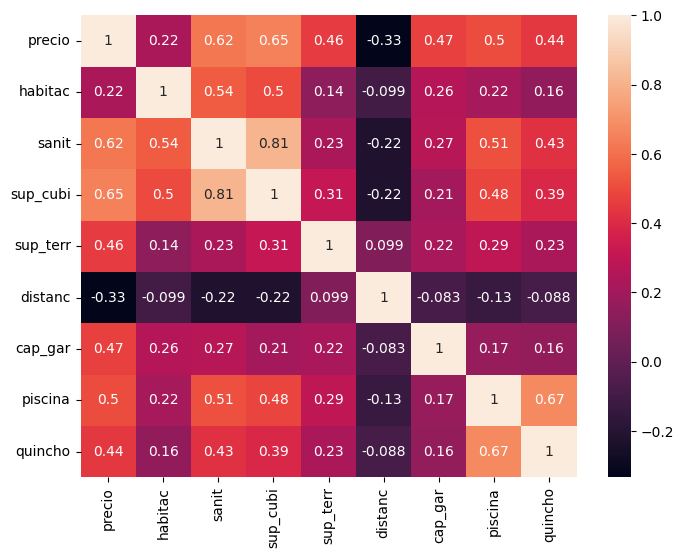

In [ ]:
corr_datos = datos2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_datos, annot=True)
plt.show()

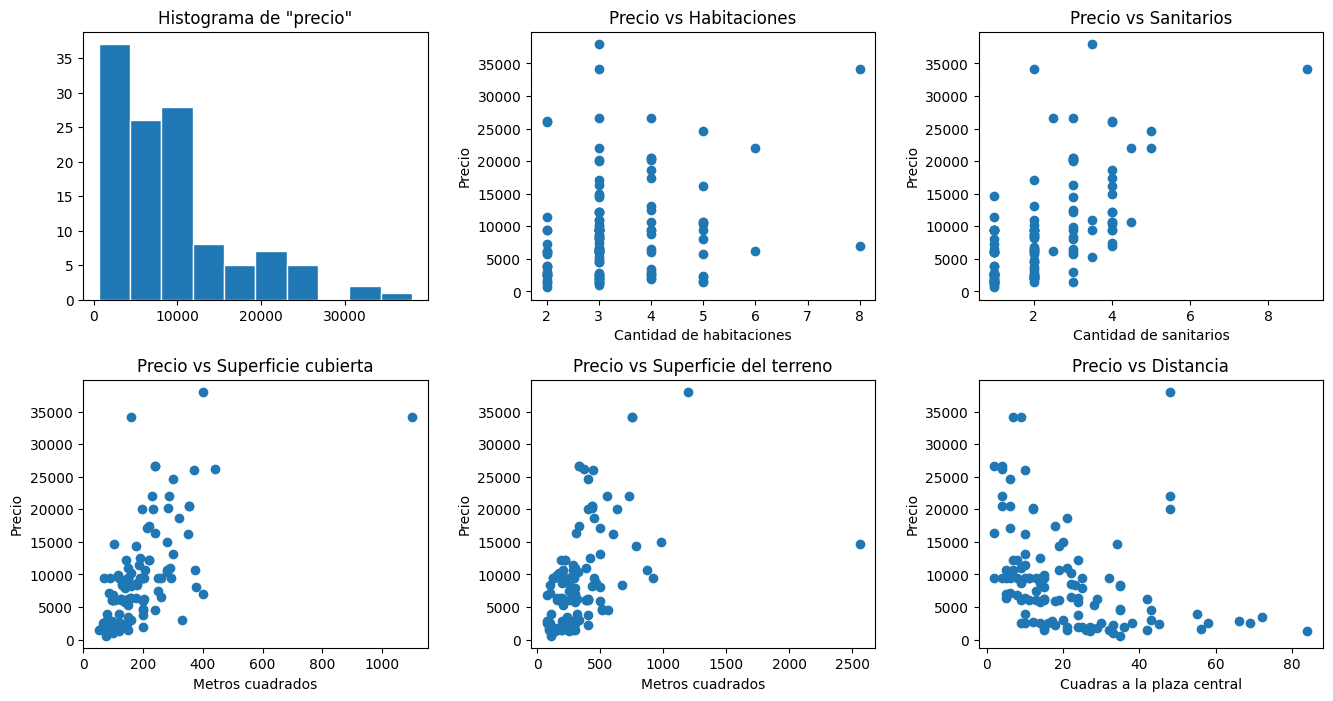

In [ ]:
# Variables regresoras
variables = ['habitac','sanit','sup_cubi','sup_terr','distanc']

# Títulos de los gráficos de dispersión
titulos = ['Precio vs Habitaciones',
           'Precio vs Sanitarios',
           'Precio vs Superficie cubierta',
           'Precio vs Superficie del terreno',
           'Precio vs Distancia']

# Títulos de los ejes x
xs = ['Cantidad de habitaciones',
      'Cantidad de sanitarios',
      'Metros cuadrados',
      'Metros cuadrados',
      'Cuadras a la plaza central']

# Graficamos
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

for i in range(2):
  for j in range(3):
    if (i==0 and j==0):
      # Histograma de precio
      ax[i,j].hist(datos2['precio'], edgecolor="white", bins=10)
      ax[i,j].set_title('Histograma de "precio"')
    else:
      # Gráficos de dispersión
      ax[i,j].scatter(datos2[variables[i*3+j-1]],datos2['precio'])
      ax[i,j].set_title(titulos[i*3+j-1])
      ax[i,j].set_xlabel(xs[i*3+j-1])
      ax[i,j].set_ylabel('Precio')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

Al igual que en ejemplo anterior, transformamos la variable 'precio' para favorecer el cumplimiento de supuestos del modelo:

In [ ]:
datos2['log_precio'] = np.log(datos2['precio'])

Vemos nuevamente la salida anterior pero con la variable transformada:

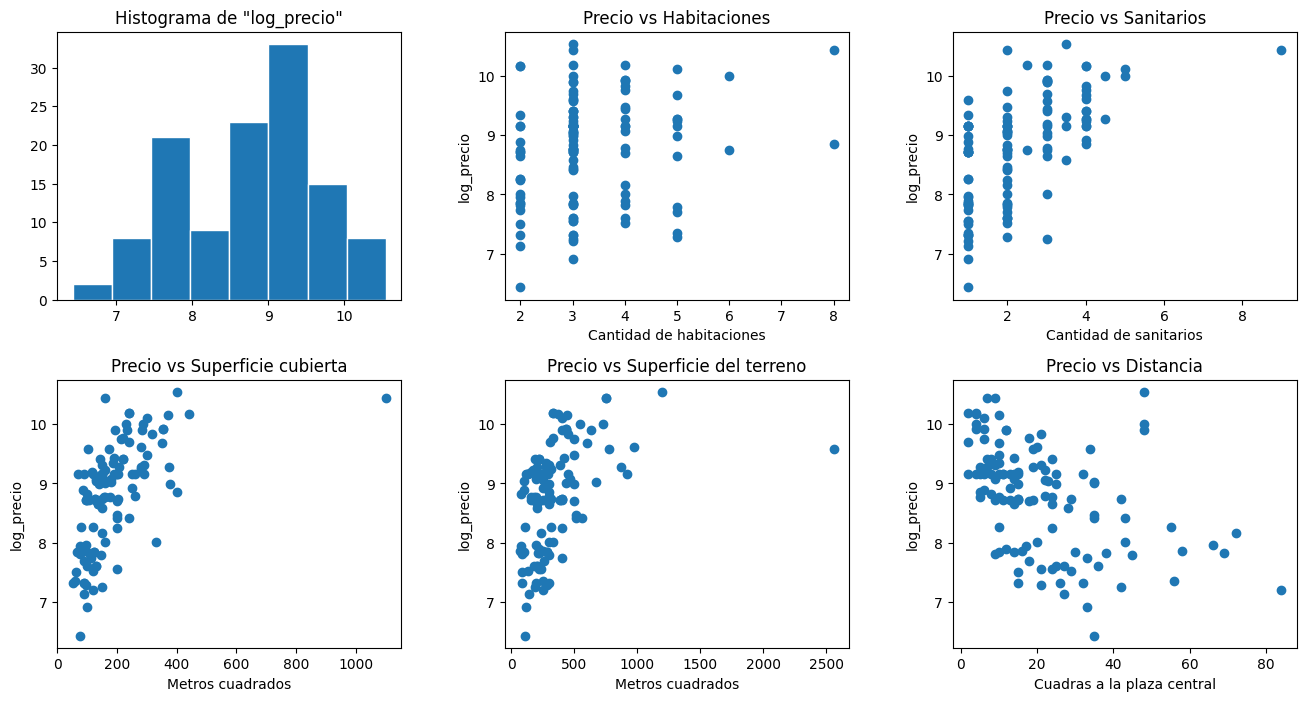

In [ ]:
# Variables regresoras
variables = ['habitac','sanit','sup_cubi','sup_terr','distanc']

# Títulos de los gráficos de dispersión
titulos = ['Precio vs Habitaciones',
           'Precio vs Sanitarios',
           'Precio vs Superficie cubierta',
           'Precio vs Superficie del terreno',
           'Precio vs Distancia']

# Títulos de los ejes x
xs = ['Cantidad de habitaciones',
      'Cantidad de sanitarios',
      'Metros cuadrados',
      'Metros cuadrados',
      'Cuadras a la plaza central']

# Graficamos
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

for i in range(2):
  for j in range(3):
    if (i==0 and j==0):
      # Histograma de precio
      ax[i,j].hist(datos2['log_precio'], edgecolor="white", bins=8)
      ax[i,j].set_title('Histograma de "log_precio"')
    else:
      # Gráficos de dispersión
      ax[i,j].scatter(datos2[variables[i*3+j-1]],datos2['log_precio'])
      ax[i,j].set_title(titulos[i*3+j-1])
      ax[i,j].set_xlabel(xs[i*3+j-1])
      ax[i,j].set_ylabel('log_precio')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

Boxplots para variables binarias

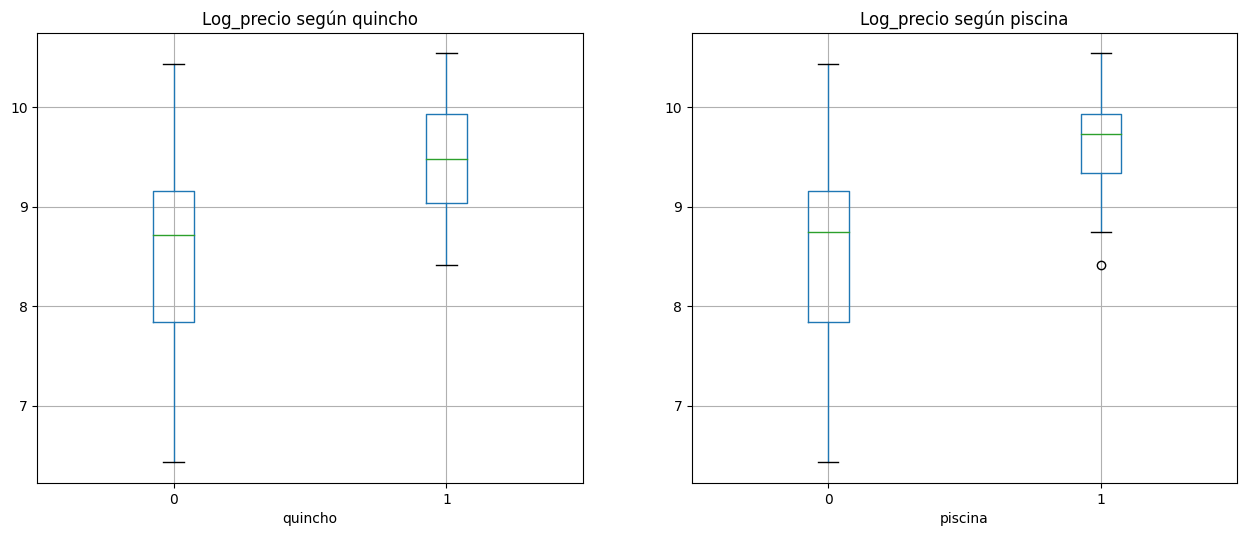

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot de log_precio según tiene o no quincho
datos2.boxplot(column='log_precio', by = 'quincho', ax=ax[0])
ax[0].set_title("Log_precio según quincho")

# Boxplot de log_precio según tiene o no piscina
datos2.boxplot(column='log_precio', by = 'piscina', ax=ax[1])
ax[1].set_title("Log_precio según piscina")

fig.suptitle('')
plt.show()

## Ajuste del modelo

El objetivo es ajustar un modelo de regresión para explicar precio de las casas de Resistencia. El modelo que estimaremos es el siguiente:

$$log\_precio=\beta_0 + \beta_1 habitac + \beta_2 sanit + \beta_3 sup\_cubi + \beta_4 sup\_terr + \beta_5 distanc +
\\
\beta_6 cap\_gar + \beta_7 piscina + \beta_8 quincho + \beta_9 ubicacion + \varepsilon$$

\

Procedemos de la misma forma que antes para el ajuste:

In [ ]:
# Variables independientes
x = datos2[['habitac','sanit','sup_cubi','sup_terr','distanc','cap_gar','piscina','quincho']]
x = sm.add_constant(x) # Debemos especificar que incluya la ordenada al origen al modelo

# Variable dependiente
y = datos2['log_precio']

In [ ]:
modelo = sm.OLS(y,x).fit()

Salida del modelo de regresión lineal:

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     26.68
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.59e-22
Time:                        03:10:16   Log-Likelihood:                -90.757
No. Observations:                 119   AIC:                             199.5
Df Residuals:                     110   BIC:                             224.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4090      0.180     46.591      0.0

**Significatividad individual de las variables**

$H_0:\beta_j=0$

$H_1:\beta_j\neq 0$

Vemos que casi todas las variables son significativas a un nivel de significancia del 5%, podemos rechazar la hipótesis nula de que sus efectos sobre la variable explicada 'log_precio' son iguales a cero (es decir, tienen efecto).

En el caso de 'sup_cubi', 'piscina' y 'quincho', las variables no son significativas individualmente. Dado que son variables que presentan una correlación importante con otros regresores del modelo, podemos analizar la significancia conjunta de ellas. Probablemente, debido a la multicolinealidad, estas variables están siendo rechazadas del modelo en significatividad individual.

**Test de significatividad conjunta de variables**

$H_0: \beta_3=\beta_7=\beta_8=0$

$H_1:$ Alguna de las anteriores es distinta de cero

In [ ]:
f_stat = modelo.f_test(['sup_cubi','piscina','quincho']).fvalue
p_value = modelo.f_test(['sup_cubi','piscina','quincho']).pvalue
print('Estadístico de prueba F = ', round(f_stat,6))
print('P-valor = ', round(p_value,6))

Estadístico de prueba F =  2.465003
P-valor =  0.066103


In [ ]:
datos2[['sup_cubi','piscina','quincho']].corr()

,sup_cubi,piscina,quincho
sup_cubi,1.000000,0.480146,0.390631
piscina,0.480146,1.000000,0.672354
quincho,0.390631,0.672354,1.000000


## Verificación de supuestos

Chequeamos cumplimiento de los supuestos del modelo de regresión lineal. Para ello, guardamos residuos y predichos del modelo:

In [ ]:
residuos = modelo.resid
predichos = modelo.fittedvalues

1) **Normalidad del error**

El modelo de regresión lineal clásico requiere del cumplimiento del supuesto de normalidad del error para poder realizar inferencia. Es decir, para poder interpretar correctamente los p-valor asociados a los coeficientes y sus intervalos de confianza. Analizamos gráficamente el comportamiento de los residuos.

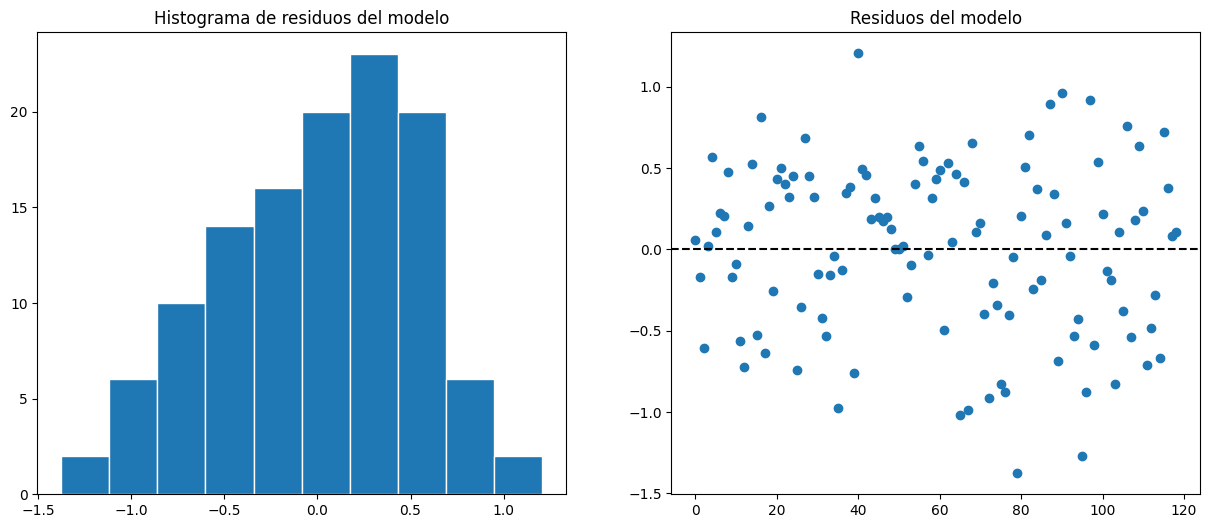

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].hist(residuos, edgecolor="white", bins=10)
ax[0].set_title("Histograma de residuos del modelo")

ax[1].scatter(datos2.index, residuos)
ax[1].axhline(0, color="black", linestyle="dashed")
ax[1].set_title("Residuos del modelo")

plt.show()

2) **Homocedasticidad:** varianza constante de los residuos

El modelo lineal clásico requiere que la varianza de los residuos no dependa del nivel de los regresores, es decir, que sea constante. Podemos analizar el cumplimiento de este supuesto, primeramente, con un análisis gráfico de residuos vs predichos. Lo que esperamos observar es que la dispersión de los residuos alrededor de su media en 0 se mantiene constante para todo el rango de los predichos.

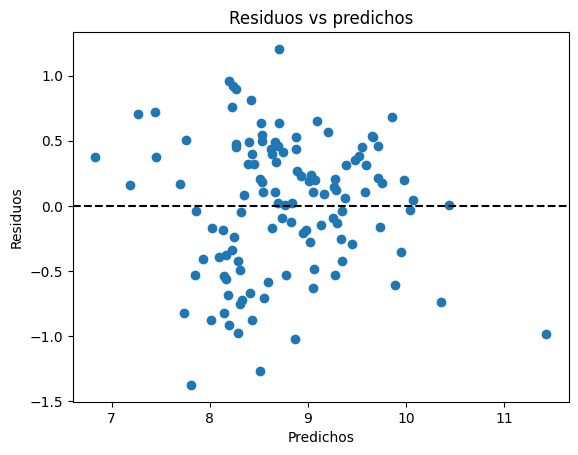

In [ ]:
plt.scatter(predichos, residuos)
plt.axhline(0, color="black", linestyle="dashed")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs predichos")
plt.show()

**Prueba de Breusch-Pagan**

In [ ]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuos, x)
print("Estadístico de prueba:", bp_test[0])
print("p-valor:", bp_test[1])

Estadístico de prueba: 9.505046031495638
p-valor: 0.30149586684321744


In [ ]:
resultado_prueba = "No se rechaza la hipótesis nula de homocedasticidad" if bp_test[1]>0.05 else "Se rechaza la hipótesis nula de homocedasticidad"
print(resultado_prueba)

No se rechaza la hipótesis nula de homocedasticidad


**Prueba de White**

In [ ]:
white_test = sm.stats.diagnostic.het_white(residuos, x)
print("Estadístico de prueba:", white_test[0])
print("p-valor:", bp_test[1])

Estadístico de prueba: 47.60742960797155
p-valor: 0.30149586684321744


In [ ]:
resultado_prueba = "No se rechaza la hipótesis nula de homocedasticidad" if white_test[1]>0.05 else "Se rechaza la hipótesis nula de homocedasticidad"
print(resultado_prueba)

No se rechaza la hipótesis nula de homocedasticidad
